# *Import libraries*

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

# *Load the dataset*

In [13]:
# Step 1: Load the dataset
df = pd.read_csv(r"d:\Volume E\project\FRAUD-DETECTION-ML\data\raw\creditcard.csv")

# *Basic exploration*

In [14]:
# Step 2: Basic exploration
print("Dataset Shape:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nClass Distribution:")
print(df['Class'].value_counts())  # Updated column name

Dataset Shape: (284807, 31)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20   

In [5]:
# Step 3: Summary Statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

In [15]:
# Step 4: Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 1081


In [16]:
# Remove duplicates
df = df.drop_duplicates()
print("\nDataset Shape after removing duplicates:", df.shape)


Dataset Shape after removing duplicates: (283726, 31)


# *Data Visualization*

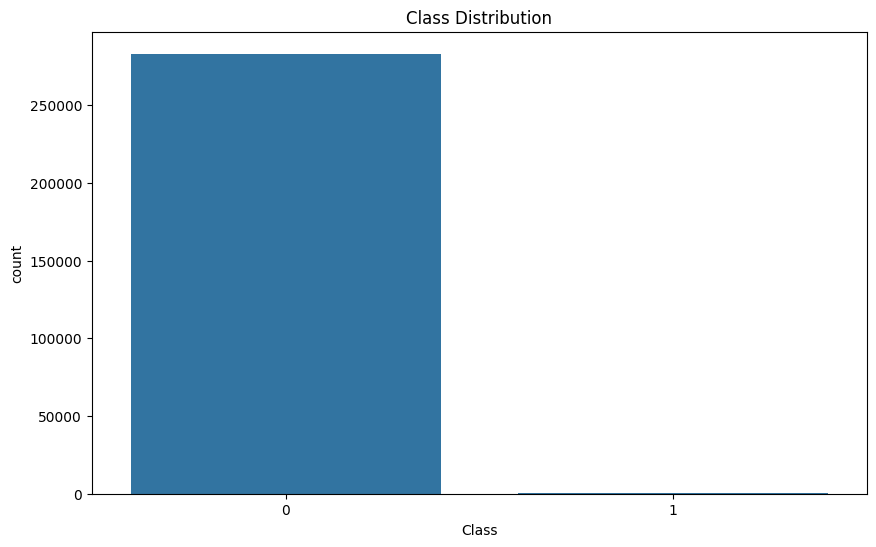

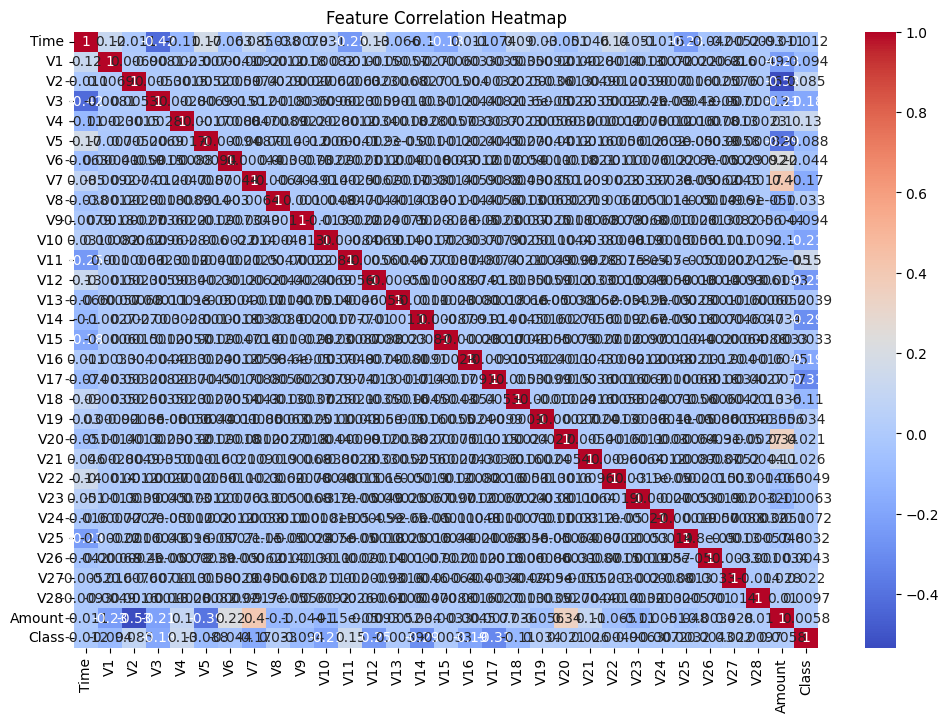

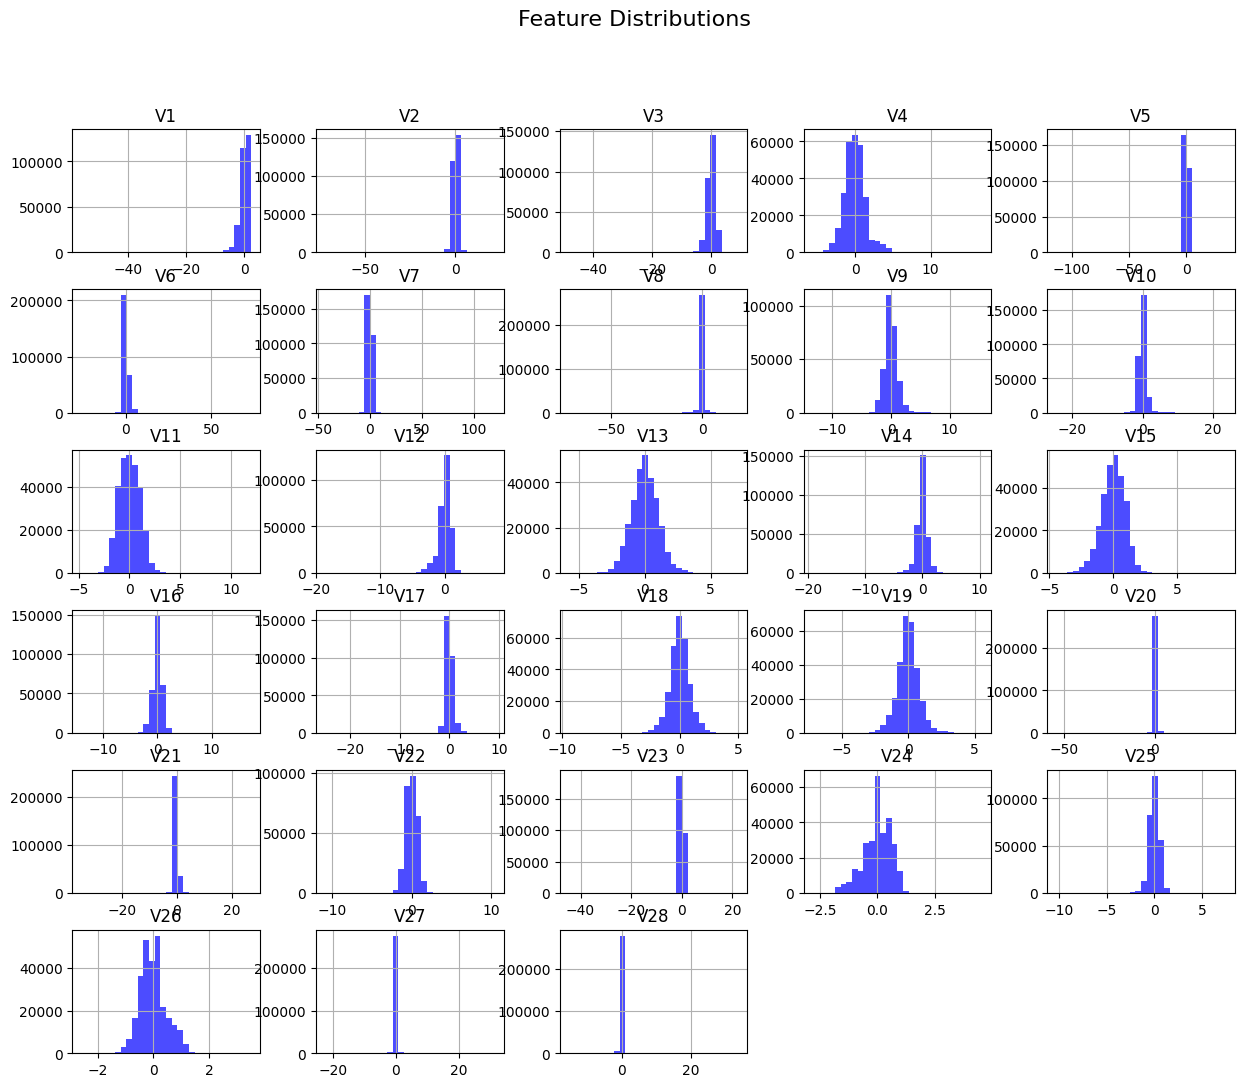

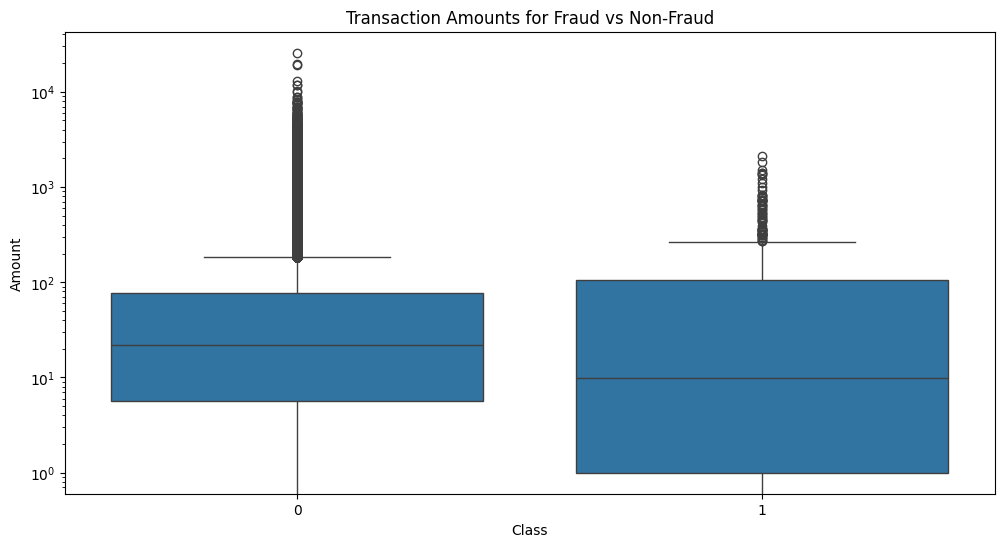

In [21]:
# Step 5: Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
# Feature Distribution
df.drop(columns=['Time', 'Amount', 'Class']).hist(figsize=(15, 12), bins=30, color='blue', alpha=0.7)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()
# Box Plot for Fraud Detection
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')  # Log scale for better visualization
plt.title("Transaction Amounts for Fraud vs Non-Fraud")
plt.show()

# *Train-Test Split*

In [22]:
# Step 6: Train-Test Split
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Class'])


In [23]:
# Step 7: Ensure output directory exists
os.makedirs("../data/processed", exist_ok=True)

# Step 8: Save processed datasets
train.to_csv("../data/processed/train.csv", index=False)
test.to_csv("../data/processed/test.csv", index=False)
df.to_csv("../data/processed/cleaned_data.csv", index=False)

print("\nTrain, Test, and Cleaned datasets saved successfully!")



Train, Test, and Cleaned datasets saved successfully!
